# Question 1

## 2.1.1

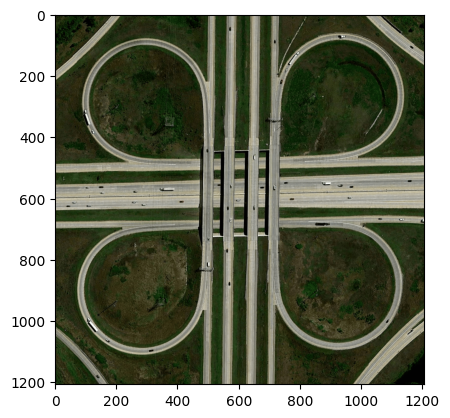

In [327]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt


def load_cloverleaf_interchange_image(img_path):
    img = cv.imread(img_path, cv.IMREAD_COLOR)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    if img is None:
        sys.exit("Could not read the image.")

    return img, img_rgb

img, img_rgb = load_cloverleaf_interchange_image("../archive/cloverleaf_interchange.png")
plt.imshow(img_rgb.squeeze())

In [328]:
print(img.shape)#dimensions
print(img.size)
print(img.dtype)

min_r, max_r = 256,0
min_g, max_g = 256,0
min_b, max_b = 256,0

rows, cols, _ = img.shape
for i in range(rows):
    for j in range(cols):
        k = img[i,j]
        if k[0] < min_r:
            min_r = k[0]
        if k[1] < min_g:
            min_g = k[1]
        if k[2] < min_b:
            min_b = k[2]
        if k[0] > max_r:
            max_r = k[0]
        if k[1] > max_g:
            max_g = k[1]
        if k[2] > max_b:
            max_b = k[2]
        
print(min_r,max_r)   
print(min_g,max_g)  
print(min_b,max_b)  


(1207, 1207, 3)
4370547
uint8
0 249
1 253
1 250


### open_cv histogram

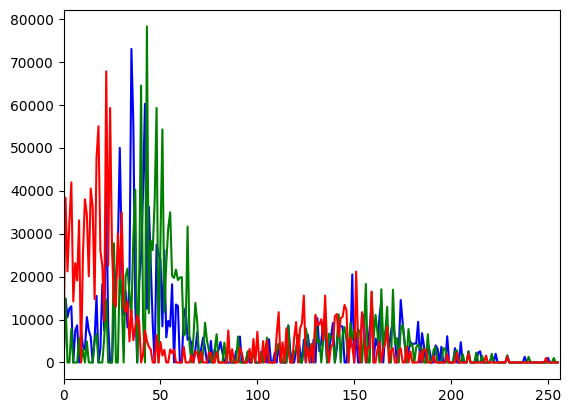

In [329]:
from matplotlib import pyplot as plt

hist_r = cv.calcHist([img],[0],None,[256],[0,256])
hist_g = cv.calcHist([img],[1],None,[256],[0,256])
hist_b = cv.calcHist([img],[2],None,[256],[0,256])

plt.plot(hist_b, color = 'b')
plt.plot(hist_g, color = 'g')
plt.plot(hist_r, color = 'r')
plt.xlim([0,256])

plt.show()


### own_histogram

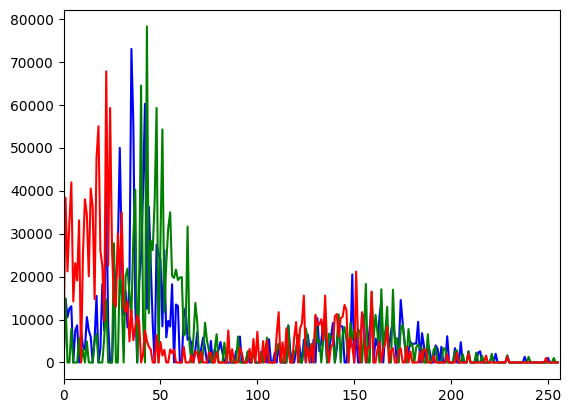

In [330]:
hist_man_r = [0]*256
hist_man_g = [0]*256
hist_man_b = [0]*256

for i in range(rows):
    for j in range(cols):
        k = img[i,j]
        hist_man_r[k[0]]= hist_man_r[k[0]] +1
        hist_man_g[k[1]]= hist_man_g[k[1]] +1
        hist_man_b[k[2]]= hist_man_b[k[2]] +1


plt.plot(hist_man_b, color = 'b')
plt.plot(hist_man_g, color = 'g')
plt.plot(hist_man_r, color = 'r')
plt.xlim([0,256])

plt.show()


my implementation of the histogram function goes through every pixel and updates the values of each individual r , g , b frequency array. and then plots them.

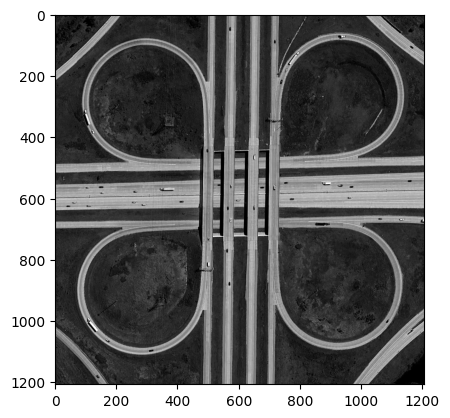

In [331]:
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
plt.imshow(img_gray.squeeze(), cmap='gray')

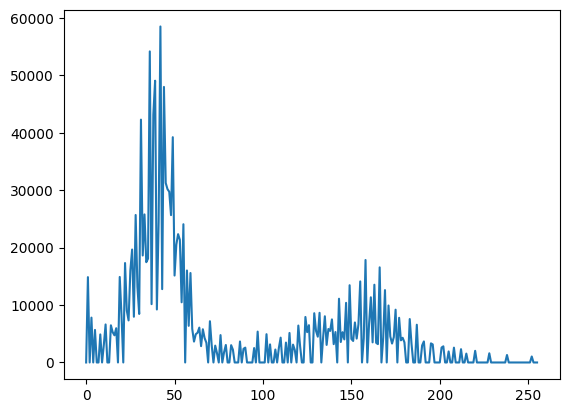

In [332]:

hist = cv.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()



## 2.1.2 

In [333]:
# blur = cv.bilateralFilter(img_gray,9,75,75)
# cv.imshow("Display window", blur)
# cv.waitKey(0)
# cv.destroyAllWindows()

# fucks shit up

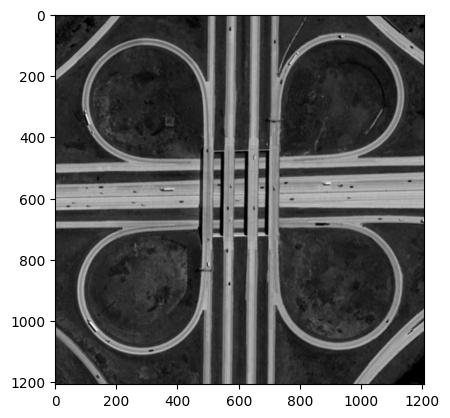

In [334]:
# blur = cv.GaussianBlur(img_gray,(5,5),0)
# cv.imshow("Display window", blur)
# cv.waitKey(0)
# cv.destroyAllWindows()

blur = cv.blur(img_gray,(5,5))
plt.imshow(blur.squeeze(), cmap='gray')

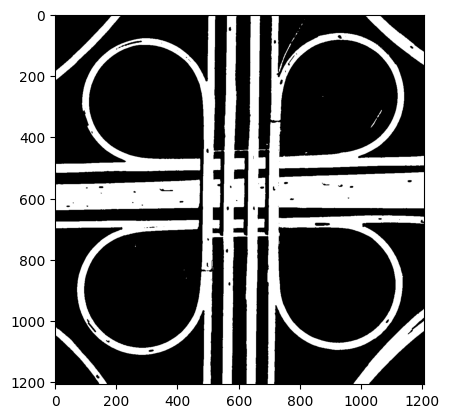

In [335]:
ret,th1 = cv.threshold(blur,100,255,cv.THRESH_BINARY)
plt.imshow(th1.squeeze(), cmap='gray')


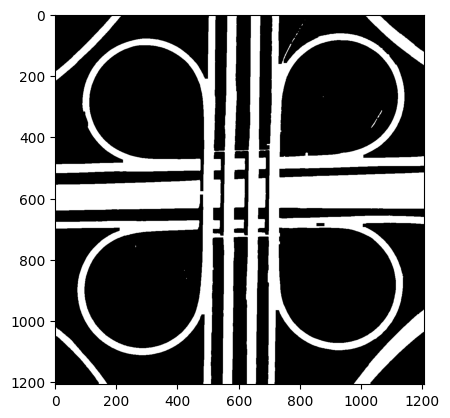

In [336]:
import numpy as np
kernel = np.ones((10,10),np.uint8)
closing = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
plt.imshow(closing.squeeze(), cmap='gray')

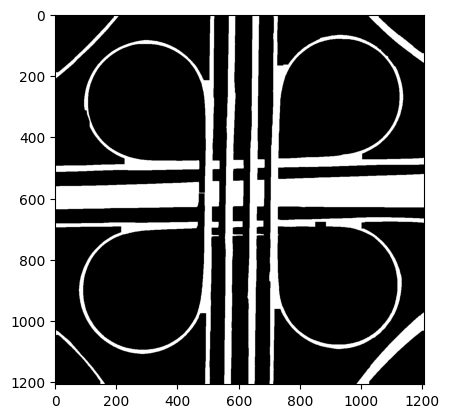

In [337]:
kernel = np.ones((10,10),np.uint8)
erosion = cv.erode(closing,kernel,iterations = 1)
plt.imshow(erosion.squeeze(), cmap='gray')

In [338]:
# laplacian = cv.Laplacian(closing,cv.CV_64F)
# cv.imshow("Display window", laplacian)
# cv.waitKey(0)
# cv.destroyAllWindows()

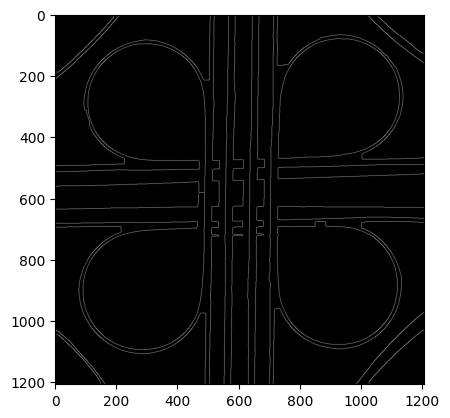

In [339]:
edges = cv.Canny(erosion,100,200)
plt.imshow(edges.squeeze(), cmap='gray')

the first step was to convert the image to grayscale then i applied a threshold on it so that the road and the grass could be distinct. i chose the values for the threashold after refering to the histogram,
then to get rid on the cars and other noise i applied closing which got rid of the black spots. then i eroded the roads so that only one circle is detected. then i did edge detction and it converted to a binary image.

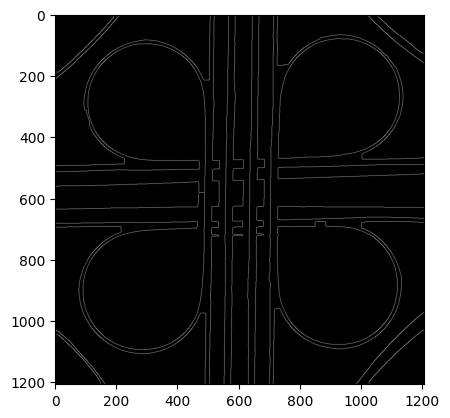

In [340]:
# blur = cv.GaussianBlur(img_gray,(5,5),0)
# cv.imshow("Display window", blur)
# cv.waitKey(0)
# cv.destroyAllWindows()

def preprocess_image(img_gray):

    blur = cv.blur(img_gray,(5,5))
    
    ret,th1 = cv.threshold(blur,100,255,cv.THRESH_BINARY)

    kernel = np.ones((10,10),np.uint8)
    closing = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
    
    kernel = np.ones((10,10),np.uint8)
    erosion = cv.erode(closing,kernel,iterations = 1)
    
    edges = cv.Canny(erosion,100,200)

    return edges 

edges = preprocess_image(img_gray)
plt.imshow(edges.squeeze(), cmap='gray')

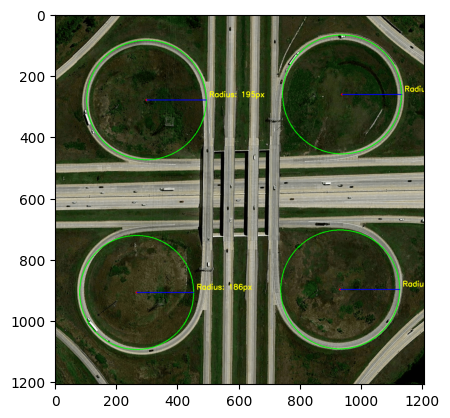

In [341]:


def detect_cloverleaves(edges):
    circles = cv.HoughCircles(edges,cv.HOUGH_GRADIENT,1,40,
                                param1=50,param2=30,minRadius=100,maxRadius=200)
    
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        
        cv.circle(img_rgb,(i[0],i[1]),i[2],(0,255,0),2)
        
        cv.circle(img_rgb,(i[0],i[1]),2,(255,0,0),3)
        radius_point = (i[0] + i[2], i[1]) 
        cv.line(img_rgb, (i[0], i[1]), radius_point, (0, 0, 255), 2)
        
  
        cv.putText(img_rgb, f"Radius: {i[2]}px", 
                   (i[0] + i[2] + 10, i[1] - 10), 
                   cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)
    
    plt.imshow(img_rgb.squeeze())

    return img_rgb, circles
img_rgb, circles = detect_cloverleaves(edges)



The Hough Circle Transform (cv.HoughCircles) was applied on the preprocessed edges to detect circular shapes. The following parameters were chosen:

param1=50: Gradient threshold for edge detection within the algorithm.

param2=30: Accumulator threshold for circle detection; lower values allow more circles to be detected.

minRadius=100 and maxRadius=200: Defined the size range for the cloverleaf circles based on prior knowledge of their dimensions.

2. Challenges in Detecting Cloverleaf Circles

- Environmental noise or image artifacts can create false edges, leading to incorrect circle detection.
Blurring and morphological operations were used to address these issues.


- Cloverleaf patterns often include overlapping circles, complicating individual circle detection.
Careful parameter tuning of minRadius, maxRadius, and param2 reduced the detection of merged or incomplete circles.


- Some regions may deviate from perfect circles, causing missed detections.
Incorporating adaptive techniques like elliptical fitting could improve accuracy.

3. Algorithm Failures and Limitations


- High sensitivity in edge detection or accumulator thresholds can detect non-circular shapes as circles.
Buildings or roads with circular elements might be falsely detected as cloverleaf structures.
Circles with weak edges or those partially obscured might not accumulate enough votes in the Hough Transform.
A faintly visible circle might be overlooked due to high param2 thresholds.
Dynamically adjusting param2 based on edge intensity could help.

- The success of detection relies heavily on effective preprocessing. Poor parameter choices can lead to suboptimal edge maps and missed circles.

- Larger or more complex images increase computational costs and detection time.Optimizing the preprocessing pipeline and using parallel processing could alleviate this issue.

In [342]:
def calculate_area(circles):
    radius = []
    area = []

    for circle in circles[0, :]:  
        r = np.round(circle[2]) 
        radius.append(r)  
        area.append((3*(np.pi * r * r) + (r * r) ) / 4) 

    print(area)

calculate_area(circles)


[np.float64(99100.54548956391), np.float64(98086.73583287909), np.float64(98086.73583287909), np.float64(90163.90458269435)]


Above is the area calculated from the radius acquired from HCT

HCT returns the radius in the function that i have chosen to detect the circles, overlapping or intersecting circles may lead to merged detections, inflating the radius.

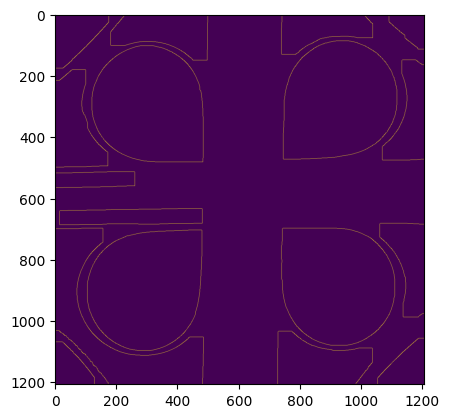

In [343]:

img_a, img_a_r = load_cloverleaf_interchange_image("../archive/cloverleaf_interchange.png")

img_a = cv.cvtColor(img_a, cv.COLOR_RGB2GRAY)
img_a = cv.bilateralFilter(img_a,9,75,75)
ret,th1 = cv.threshold(img_a,100,255,cv.THRESH_BINARY)
kernel = np.ones((10,10),np.uint8)
img_a = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)

kernel = np.ones((10,10),np.uint8)
img_a = cv.morphologyEx(img_a, cv.MORPH_OPEN, kernel)

kernel = np.ones((10,15),np.uint8)
img_a = cv.dilate(img_a,kernel,iterations = 4)


kernel = np.ones((10,10),np.uint8)
img_a = cv.erode(img_a,kernel,iterations = 5)


edges_a = cv.Canny(img_a,100,200)





plt.imshow(edges_a.squeeze())

# contours, _ = cv.findContours(median, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# mask = np.ones_like(median) * 255 
# for contour in contours:
#     area = cv.contourArea(contour)
#     if area < 100: 
#         cv.drawContours(mask, [contour], -1, 0, -1)
# cleaned_image = cv.bitwise_and(median, mask)

# closing_1 = cv.morphologyEx(cleaned_image, cv.MORPH_CLOSE, kernel)



[120577.5, 120470.0, 118666.0, 118544.5, 114399.0, 114278.0, 117481.0, 117364.0]


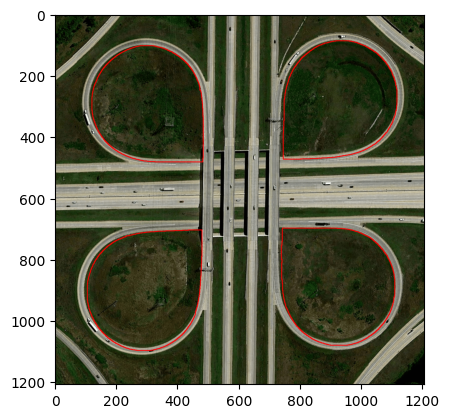

In [ ]:
# plt.imshow(edges.squeeze(), cmap = "gray")

contours, _ = cv.findContours(edges_a, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

circular_contours = []
areas = []

for cnt in contours:
    area = cv.contourArea(cnt)
    perimeter = cv.arcLength(cnt, True)
    
    if perimeter == 0: 
        continue

    circularity = (4 * 3.14159 * area) / (perimeter ** 2)
    
    if 0.8 < circularity < 1.2: 
        circular_contours.append(cnt)
        areas.append(area)
        cv.drawContours(img_a_r, [cnt], -1, (255, 0, 0), thickness=2) 

plt.imshow(img_a_r.squeeze())      
print(areas)  



This area is returned by the contour detection function